In [1]:
import sys

from IPython.display import Image, display
if 'google.colab' in sys.modules:
    from google.colab import drive
    drive.mount('/content/drive')

%cd '/content/drive/MyDrive/Inteligencia Artificial y Aprendizaje Maquinal/IA - Clases de Práctica/ContenidosPorTemas'

[WinError 3] El sistema no puede encontrar la ruta especificada: "'/content/drive/MyDrive/Inteligencia Artificial y Aprendizaje Maquinal/IA - Clases de Práctica/ContenidosPorTemas'"
c:\Users\yeyer\OneDrive\Desktop\Aprendizaje maquianal practicas\AM_PMC


C:\Users\yeyer\AppData\Roaming\Python\Python311\site-packages\IPython\core\magics\osm.py:393: UserWarning: This is now an optional IPython functionality, using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})


# Perceptrón Multicapa (PMC)
La figura a continuación, muestra una red neuronal de 3 capas:
- Capa de entrada _(in)_, no se cuenta como capa en sí y corresponde a los datos de entrada
- Capa oculta _(h)_
- Capa de salida _(o)_


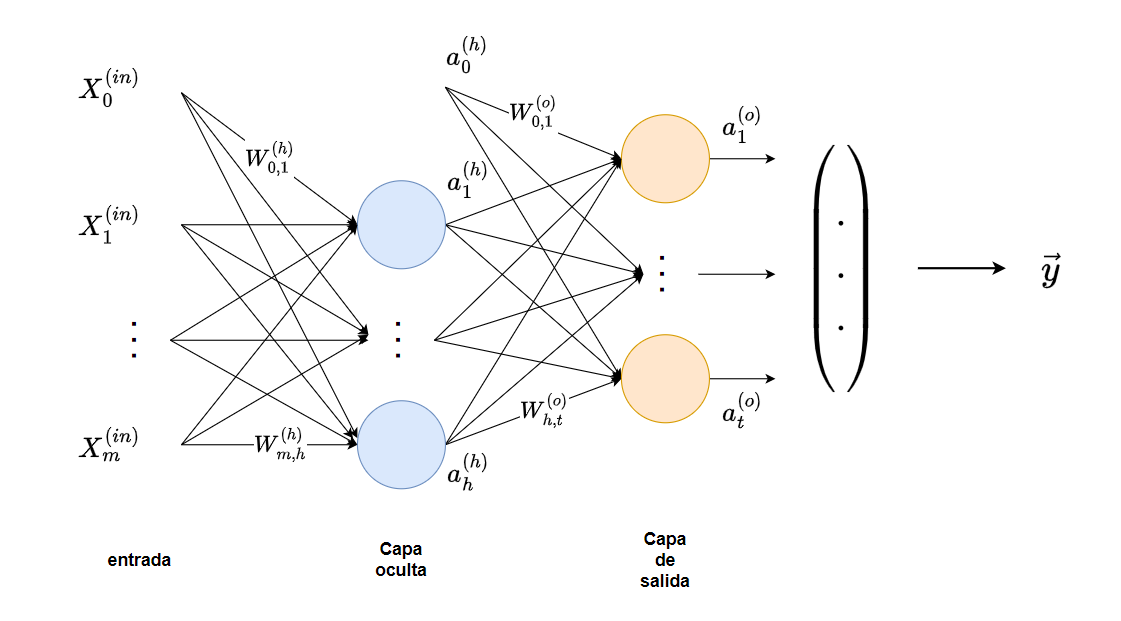

In [2]:
display(Image(filename='./2_imagenes/MLP.png', width=800))

Llamamos a la salida del _i-ésimo_ nodo en la _l-ésima_ capa: $a_i^{(l)}$.

$X_0^{(in)}$ y $a_0^{(h)}$ son las **unidades de bias** los cuales igualamos a 1.

Cada nodo en la capa $l$ está conectado a todos los nodos en la capa  $l+1$ a través de un coeficiente de la matriz de pesos. Como ejemplo, la conexión entre el _k-ésimo_ nodo en la capa $l$ al _j-ésimo_ nodo en la capa $l+1$ sería $w_{k,j}^{(l)}$. Cuando todas las neuronas en una capa están conectadas a cada neurona de la capa anterior, la capa se denomina _densa_ o _fully connected_.

Denominamos $W^{(h)}$ la matriz de pesos que conecta las entradas con la capa oculta y $W^{(o)}$ la matriz de pesos que conecta una capa oculta a la capa de salida.

La matriz de pesos $W^{(h)}$ tiene dimensiones $d$ x $m$ donde _d_ es el número de nodos de la capa oculta y _m_ es el número de entradas mas la unidad de bias.

## Algoritmo de entrenamiento de un Perceptrón Multicapa

1. Iniciando en la capa de entrada, propagamos hacia adelante los datos de entrenamiento a través de la red para obtener la salida.
2. En base a la salida de la red, calculamos el error que queremos minimizar usando una función de costo.
3. Hacemos la retropropagación del error, hallamos su derivada respecto a cada uno de los pesos en la red y actualizamos los pesos.

Después de repetir estos pasos y los pesos convergen, hacemos la propagación hacia adelante para obtener la salida de la red y aplicamos una función umbral para obtener la predicción de la etiqueta de clase.

## Funciones de activación

Para que el algoritmo de retropropagación funcione correctamente, es necesario cambiar las funciones de activación de cada perceptrón con la función logística.

Existen funciones de activación adicionales que funcionan muy bien con el algoritmo:

**Función Logística o Sigmoidea:** función continua y diferenciable en forma de 'S'. Sus valores de salida varían entre 0 y 1.

$$\sigma(z) = \frac{1}{(1 + exp(-z))}$$

**Función tangente hiperbólica:** similar a la anterior pero sus valores de salida varían entre -1 y 1.

$$\tanh(z) = 2\sigma(2z) -1$$

**Función unidad lineal rectificada (ReLU)** es continua pero no diferenciable en z=0, su derivada es 0 para $z<0$.

$$ReLU(z) = max(0,z)$$

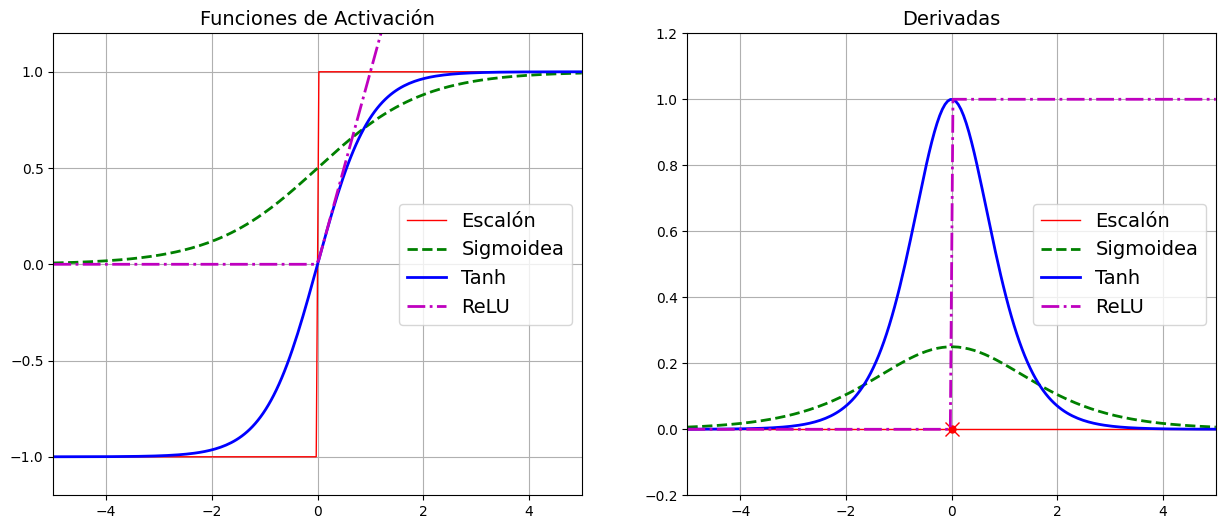

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

z = np.linspace(-5, 5, 200)

plt.figure(figsize=(15,6))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Escalón")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoidea")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Funciones de Activación", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Escalón")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoidea")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Derivadas", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])
plt.show()

### Uso de la clase _MLPClassifier_ de sklearn

A continuación vamos a utilizar la clase _MLPClassifier_ para resolver el problema del XOR.

Los datos de entrada (X) y salida (y) se encuentran en el archivo `datos_xor.mat` en la carpeta "data"

In [4]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

**cargamos y graficamos los datos**

In [5]:
# Cargamos los datos en variables de entrada (X) y salida (y)
datos_mat1 = sio.loadmat('./1_datos/datos_xor.mat')
#----------------------------------------------------------
X = datos_mat1['X']
Y = datos_mat1['Y'].flatten()

type(datos_mat1)
print("X: ",X.shape) # (80,2)
print("Y: ",Y.shape) # (80,1)

X:  (80, 2)
Y:  (80,)


In [6]:
#Modificamos las etiquetas de clase para tener clases 0 y 1
# CODIFICACION DE LA VARIABLE ETIQUETAS
from sklearn.preprocessing import LabelEncoder

# Crear el codificador
label_encoder = LabelEncoder()

# Codificar las etiquetas
Etiquetas = label_encoder.fit_transform(Y)




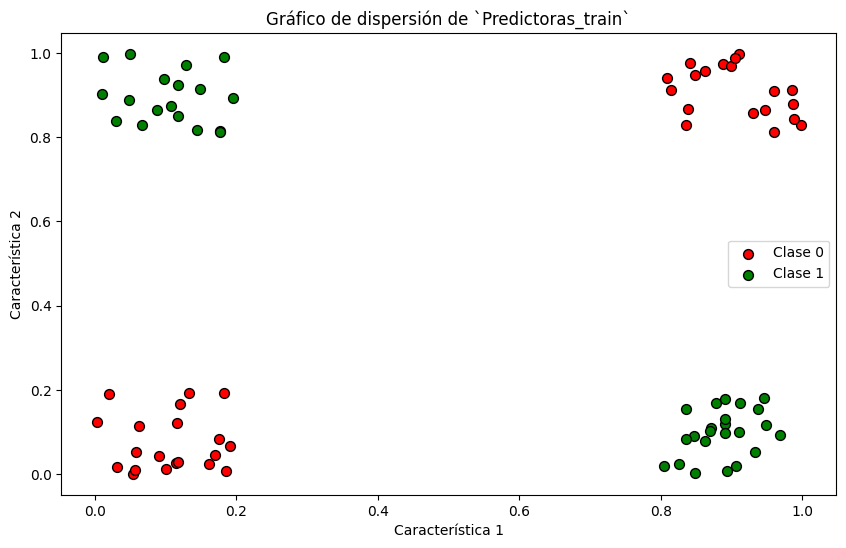

In [7]:
# Grafique los datos

# Definir los colores y etiquetas para cada clase
clases = np.unique(Etiquetas)
colores = ['r', 'g', 'b']  # Asegúrate de que haya suficientes colores para tus clases
etiquetas_clases = {0: 'Clase 0', 1: 'Clase 1'}  # Actualiza con las etiquetas reales

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))

for clase, color in zip(clases, colores):
    indices = Etiquetas == clase
    plt.scatter(X[indices, 0], X[indices, 1], 
                color=color, label=etiquetas_clases.get(clase, f'Clase {clase}'), edgecolor='k', s=50)

plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.title('Gráfico de dispersión de `Predictoras_train`')
plt.legend()
plt.show()

Entrenamos un clasificador _MLPClassifier_ con una capa oculta de 2 neuronas.

Use una función de activación sigmoidea ('logistic')  y un coeficiente de aprendizaje entre `0.1` y `0.5`.

Ver la [documentación](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) de la clase.

In [8]:
from sklearn.model_selection import train_test_split

# division de los datos en test y prueba mas las etiquetas
Predictoras_train, Predictoras_test, Etiquetas_train, Etiquetas_test = train_test_split(X, Etiquetas, test_size=0.2, shuffle=True, random_state=1)

44
1.0


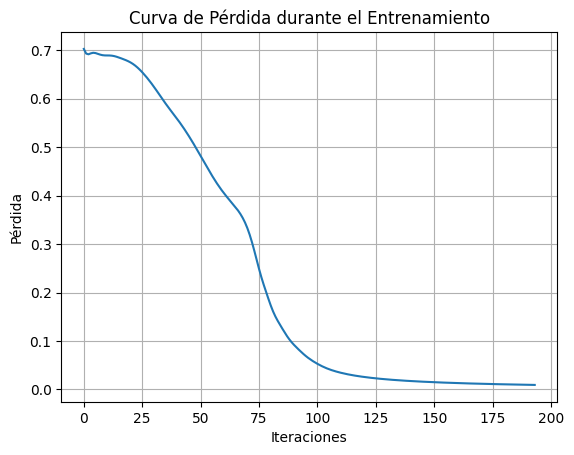

In [9]:
from sklearn.neural_network import MLPClassifier
n = np.random.randint(100)
print(n)
#---------------------------------------------------------
P_multi = MLPClassifier(random_state=1,hidden_layer_sizes=(2),activation='logistic',learning_rate_init=0.1)
P_multi.fit(Predictoras_train,Etiquetas_train)
P_multi.predict(Predictoras_test)
print(P_multi.score(Predictoras_test,Etiquetas_test))
# Grafique la curva de la función de costo o pérdida loss_curve_ (ver documentación)

# Graficar la curva de pérdida
plt.plot(P_multi.loss_curve_)
plt.title('Curva de Pérdida durante el Entrenamiento')
plt.xlabel('Iteraciones')
plt.ylabel('Pérdida')
plt.grid(True)
plt.show()

Como vimos en clase de teoría. Las neuronas en la capa oculta, estarían realizando una transformación. Es decir, mapean el espacio de entrada (X) a un nuevo espacio (X') donde los datos pueden ser linealmente separados por el nodo en la capa de salida.

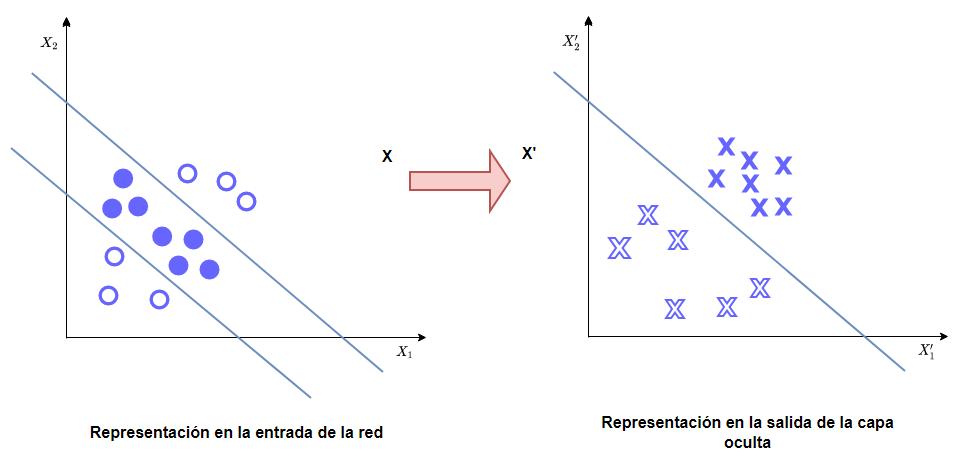

In [10]:
display(Image(filename='./2_imagenes/PMC_transformacion.png', width=1000))

Con los pesos de la capa oculta $w_h$ podemos obtener dos rectas que separan la representación de los datos entrada.

Podemos obtener las rectas a la salida de la capa oculta a partir de estos pesos $w_h$, de forma similar como hacíamos con el perceptrón simple:

$$\begin{pmatrix}1\\x_1\\x_2\end{pmatrix} \begin{pmatrix}w_{01}&w_{11}&w_{21}\\ w_{02}&w_{12}&w_{22}\\ \end{pmatrix} = 0$$

Esto nos dará como resultado dos rectas, de las cuales despejamos la pendiente y ordenada para graficarlas
$$ w_{01} + x_1 w_{11} + x_2 w_{21} = 0$$
$$ w_{02} + x_1 w_{12} + x_2 w_{22} = 0$$

### Obtener los coeficientes de los pesos de la capa oculta (Ver Documentación) y la capa de salida para graficar las rectas

Neurona 1:
  Pendientes (pesos w): [ -9.89362249 -10.16067341]
  Ordenada (bias): 5.669895057662285
Neurona 2:
  Pendientes (pesos w): [-6.49402159 -6.52382798]
  Ordenada (bias): 9.041378163771737


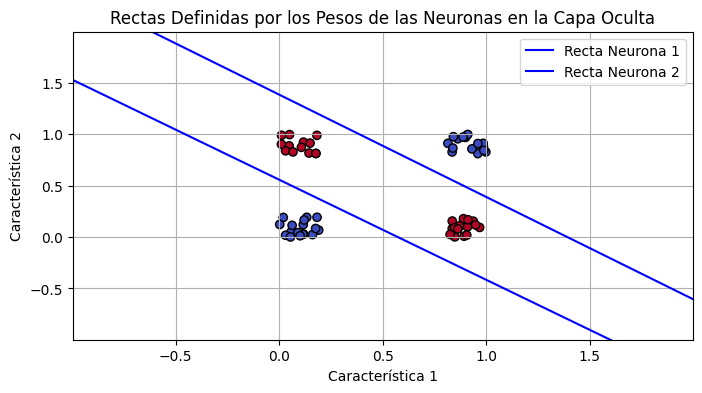

In [11]:
# Obtenga los parámetros de las rectas (pendiente y ordenada) que se forman con los pesos w_h de la capa oculta
#---------------------------------------------------------------------------
# Obtener los pesos de la capa oculta
weights_hidden = P_multi.coefs_[0]  # Pesos entre la entrada y la capa oculta
bias_hidden = P_multi.intercepts_[0]  # Sesgos de la capa oculta

# Imprimir los parámetros (pendiente y ordenada) de cada neurona
for i, (w, b) in enumerate(zip(weights_hidden.T, bias_hidden)):
    print(f"Neurona {i + 1}:")
    print(f"  Pendientes (pesos w): {w}")
    print(f"  Ordenada (bias): {b}")

# Grafique las 2 rectas junto a los datos
#------------------------------------------------------------------------------------

# Asumimos que Predictoras_train tiene 2 características (para hacer una gráfica 2D)
x_min, x_max = Predictoras_train[:, 0].min() - 1, Predictoras_train[:, 0].max() + 1
y_min, y_max = Predictoras_train[:, 1].min() - 1, Predictoras_train[:, 1].max() + 1

# Generar un rango de valores para x
x_values = np.linspace(x_min, x_max, 100)

# Definir las ecuaciones de las rectas
# Para la neurona 1: y = (-w1/w2) * x - (b/w2)
w1_1, w2_1 = weights_hidden[:, 0]
b1 = bias_hidden[0]
y_values_1 = (-w1_1 / w2_1) * x_values - (b1 / w2_1)

# Para la neurona 2: y = (-w1/w2) * x - (b/w2)
w1_2, w2_2 = weights_hidden[:, 1]
b2 = bias_hidden[1]
y_values_2 = (-w1_2 / w2_2) * x_values - (b2 / w2_2)

# Graficar los datos y las rectas
plt.figure(figsize=(8, 4))

# Graficar los datos (asumimos que son dos clases con diferentes colores)
plt.scatter(Predictoras_train[:, 0], Predictoras_train[:, 1], c=Etiquetas_train, cmap='coolwarm', edgecolors='k')

# Graficar las rectas
plt.plot(x_values, y_values_1, label='Recta Neurona 1', color='blue')
plt.plot(x_values, y_values_2, label='Recta Neurona 2', color='blue')

# Personalizar el gráfico
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.title('Rectas Definidas por los Pesos de las Neuronas en la Capa Oculta')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.legend()
plt.grid(True)
plt.show()

### Visualizando los datos transformados

Para visualizar los datos transformados $\vec{a}^{(h)}$, debemos aplicar la función de activación $\phi()$ a la combinación lineal de las entradas y los pesos de la capa oculta $\vec{z}^{(h)}$ (una vez la red está entrenada)

$$ \vec{z}^{(h)} = \vec{x}^{(in)}.(\vec{W}^{(h)})^T $$

$$ \vec{a}^{(h)} = \phi(\vec{z}^{(h)})$$

$\vec{x}^{(in)}$ corresponde a los datos de entrada X mas el bias

In [12]:
def logistic(z):
    return 1 / (1 + np.exp(-z))

Aplica la función de activación (en este caso, la logística) a la combinación lineal de las entradas y los pesos de la capa oculta para transformar los datos y grafique los datos obtenidos.

In [13]:
# Aplicar la función de activación logística a la combinación lineal de las entradas y los pesos de la capa oculta
# para transformar los datos y graficar los datos obtenidos

# Añadir una columna de unos a las entradas para el bias
X_bias = np.hstack([np.ones((Predictoras_train.shape[0], 1)), Predictoras_train])

# Calcular la combinación lineal de las entradas y los pesos de la capa oculta
z_h = np.dot(X_bias, np.vstack([P_multi.intercepts_[0], P_multi.coefs_[0]]))

# Aplicar la función de activación logística
a_h = logistic(z_h)




**Grafico de los datos transformados**

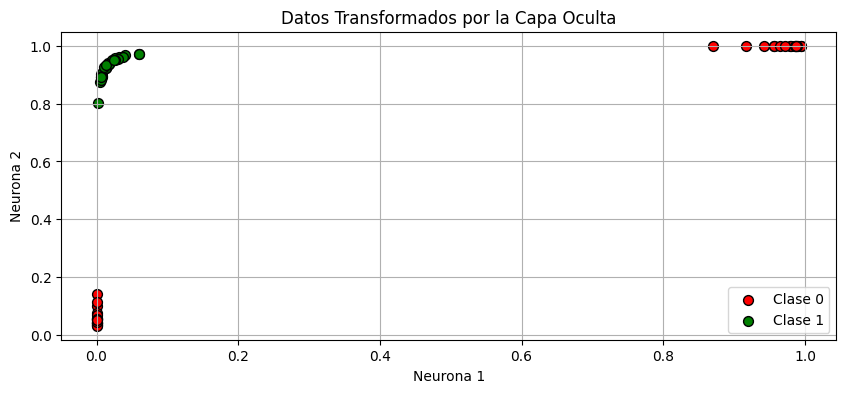

In [14]:
# Graficar los datos transformados
plt.figure(figsize=(10, 4))

# Definir los colores y etiquetas para cada clase
clases = np.unique(Etiquetas_train)
colores = ['r', 'g', 'b']  # Asegúrate de que haya suficientes colores para tus clases
etiquetas_clases = {0: 'Clase 0', 1: 'Clase 1'}  # Actualiza con las etiquetas reales

for clase, color in zip(clases, colores):
    indices = Etiquetas_train == clase
    plt.scatter(a_h[indices, 0], a_h[indices, 1], 
                color=color, label=etiquetas_clases.get(clase, f'Clase {clase}'), edgecolor='k', s=50)

plt.xlabel('Neurona 1')
plt.ylabel('Neurona 2')
plt.title('Datos Transformados por la Capa Oculta')
plt.legend()
plt.grid(True)
plt.show()

### Se debe observar que ahora los datos a la salida de la capa oculta son linealmente separables
Ahora la frontera de decisión podemos encontrarla de la misma forma que hicimos con el perceptrón simple, excepto que esta vez trabajamos con un espacio _X'_ resultado de la transformación:

$$ w_0^{(o)} + x_1' w_1^{(o)} + x_2' w_2^{(o)} = 0$$

$w^{(o)}$ corresponde a los pesos en el nodo de salida

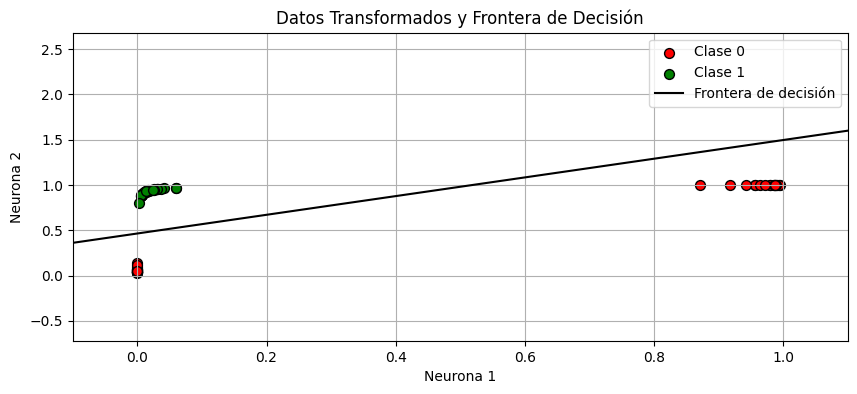

In [15]:
# Con los pesos del nodo en la capa de salida, armar la recta que separe
# los datos en el campo transformado
# --------------------------------------------------------------------------------------------------------

# Obtener los pesos de la capa de salida
weights_output = P_multi.coefs_[1]  # Pesos entre la capa oculta y la capa de salida
bias_output = P_multi.intercepts_[1]  # Sesgos de la capa de salida
# Definir la ecuación de la recta de decisión
# Para la neurona de salida: y = (-w1/w2) * x - (b/w2)
w1, w2 = weights_output[:, 0]
b = bias_output[0]
decision_boundary = (-w1 / w2) * x_values - (b / w2)

# Graficar los datos transformados y la recta
#-----------------------------------------------------------------------
plt.figure(figsize=(10, 4))

for clase, color in zip(clases, colores):
    indices = Etiquetas_train == clase
    plt.scatter(a_h[indices, 0], a_h[indices, 1], 
                color=color, label=etiquetas_clases.get(clase, f'Clase {clase}'), edgecolor='k', s=50)

plt.plot(x_values, decision_boundary, label='Frontera de decisión', color='black')

plt.xlabel('Neurona 1')
plt.ylabel('Neurona 2')
plt.title('Datos Transformados y Frontera de Decisión')
plt.legend()
plt.grid(True)

# Ajustar los límites del eje x
plt.xlim(-0.1, 1.1)

plt.show()


### Ahora vamos a entrenar un PMC para resolver el problema de la siguiente figura:

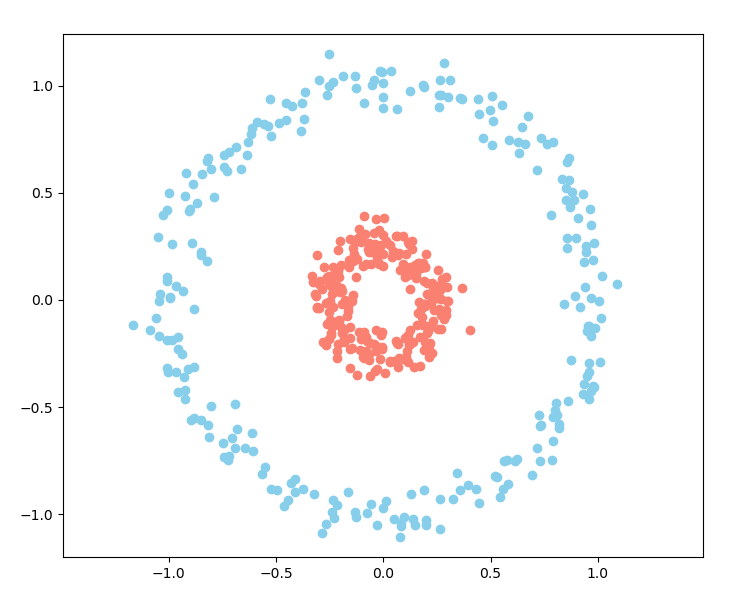

In [16]:
display(Image(filename='./2_imagenes/circle.png', width=700))

In [17]:
# Cargue los datos en variables de entrada (X) y salida (y)
#----------------------------------------
datos_mat = sio.loadmat('./1_datos/datos_circle.mat')

X = datos_mat['X']
Y = datos_mat['Y'].flatten()


print("X: ",X.shape) #(500, 2)
print("y: ",Y.shape) #(500, 1)

X:  (500, 2)
y:  (500,)


In [18]:
from sklearn.model_selection import train_test_split

# division de los datos en test y prueba mas las etiquetas
Predictoras_train, Predictoras_test, Etiquetas_train, Etiquetas_test = train_test_split(X, Y, test_size=0.2, shuffle=True, random_state=42,  stratify = Y)

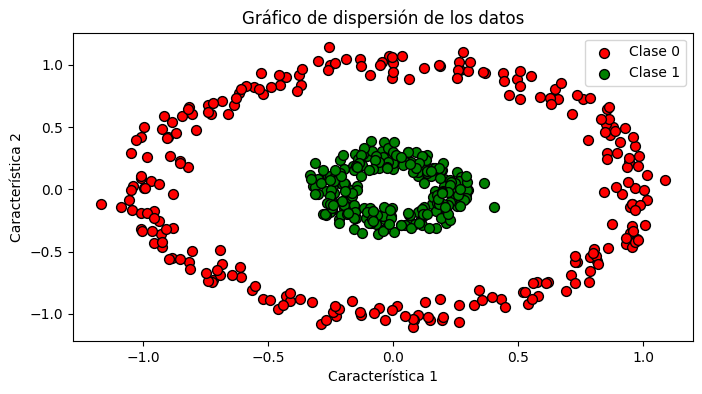

In [19]:
# Graficar los datos
#-----------------------------------------------------------------------------
plt.figure(figsize=(8, 4))

# Definir los colores y etiquetas para cada clase
clases = np.unique(Y)
colores = ['r', 'g', 'b']  # Asegúrate de que haya suficientes colores para tus clases
etiquetas_clases = {0: 'Clase 0', 1: 'Clase 1'}  # Actualiza con las etiquetas reales

for clase, color in zip(clases, colores):
    indices = Y == clase
    plt.scatter(X[indices, 0], X[indices, 1], 
                color=color, label=etiquetas_clases.get(clase, f'Clase {clase}'), edgecolor='k', s=50)

plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.title('Gráfico de dispersión de los datos')
plt.legend()
plt.show()



### Entrene un PMC

43
Precisión del modelo en el conjunto de prueba: 1.0


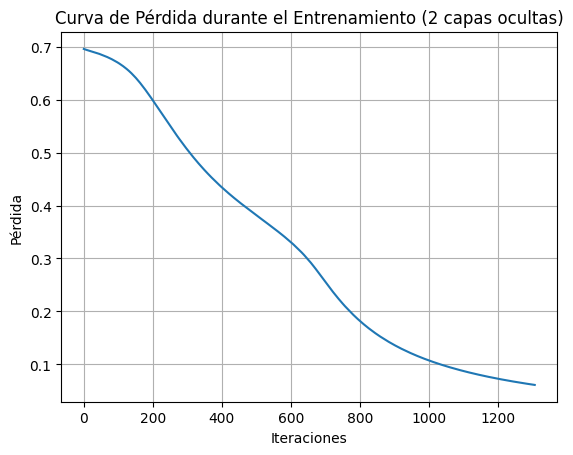

In [20]:
# Entrenar un PMC de dos capas ocultas
#---------------------------------------------------------
# Definir el modelo con dos capas ocultas de 2 neuronas cada una
n = np.random.randint(100)
print(n)
P_multi_2capas = MLPClassifier(random_state=29, hidden_layer_sizes=(3, 2), activation='tanh', solver='adam', max_iter=10000)

# Entrenar el modelo
P_multi_2capas.fit(Predictoras_train, Etiquetas_train)

# Evaluar el modelo
score = P_multi_2capas.score(Predictoras_test, Etiquetas_test)
print(f"Precisión del modelo en el conjunto de prueba: {score}")

# Graficar la curva de pérdida
plt.plot(P_multi_2capas.loss_curve_)
plt.title('Curva de Pérdida durante el Entrenamiento (2 capas ocultas)')
plt.xlabel('Iteraciones')
plt.ylabel('Pérdida')
plt.grid(True)
plt.show()

### Una vez entrenada la red usar la función **plot_decision_regions**  para graficar la frontera de decisión.

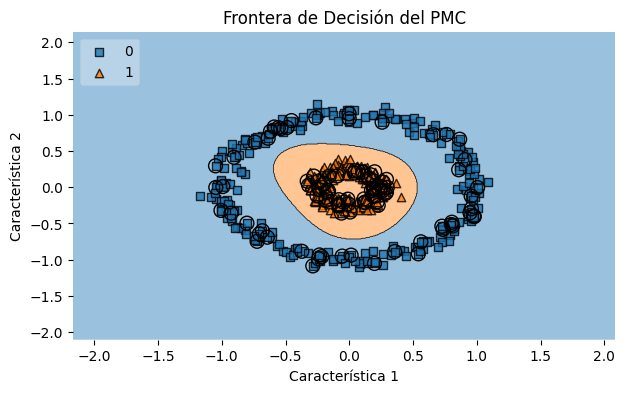

In [21]:
from mlxtend.plotting import plot_decision_regions

# Ensure mlxtend is installed

# Plot decision regions
plt.figure(figsize=(7, 4))
plot_decision_regions(X, Y, clf=P_multi_2capas, legend=2)

plt.scatter(Predictoras_test[:, 0], Predictoras_test[:, 1], facecolors='none', edgecolors='k', s=100, label='Datos de prueba')

plt.title('Frontera de Decisión del PMC')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.show()

#Graficar usando plot_decision_regions




### Analice cómo sería la transformación de los datos en la capa oculta para este ejercicio

- En qué dimensión están los datos luego de la transformación de la capa oculta. Cómo es la función que separa los datos? De forma opcional puede realizar la transformación y graficarla.

### **RESOLUCION CON DOS CAPAS CON DOS NEURONAS**

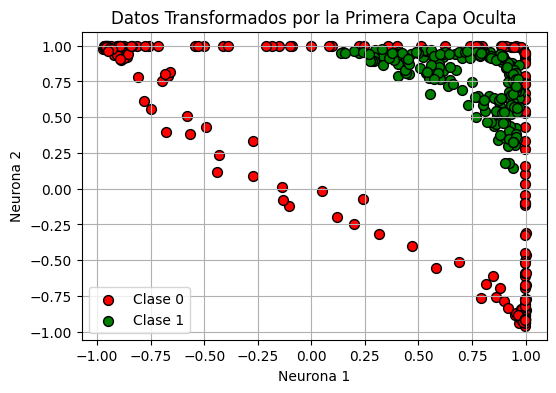

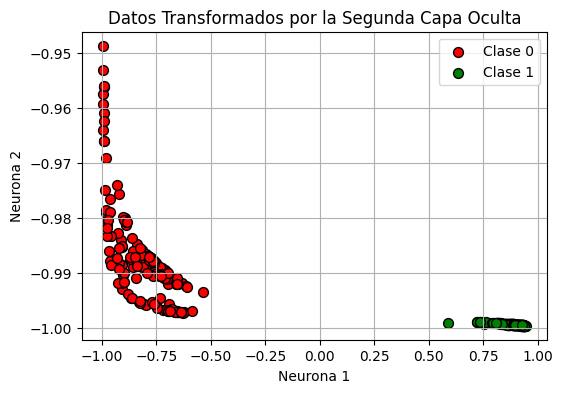

In [22]:
# Obtener los pesos y sesgos de la primera capa oculta
weights_hidden_1 = P_multi_2capas.coefs_[0]
bias_hidden_1 = P_multi_2capas.intercepts_[0]

# Añadir una columna de unos a las entradas para el bias
X_bias = np.hstack([np.ones((Predictoras_train.shape[0], 1)), Predictoras_train])

# Calcular la combinación lineal de las entradas y los pesos de la primera capa oculta
z_h_1 = np.dot(X_bias, np.vstack([bias_hidden_1, weights_hidden_1]))

# Aplicar la función de activación tanh
a_h_1 = np.tanh(z_h_1)

# Graficar los datos transformados por la primera capa oculta
plt.figure(figsize=(6, 4))

for clase, color in zip(clases, colores):
    indices = Etiquetas_train == clase
    plt.scatter(a_h_1[indices, 0], a_h_1[indices, 1], 
                color=color, label=etiquetas_clases.get(clase, f'Clase {clase}'), edgecolor='k', s=50)

plt.xlabel('Neurona 1')
plt.ylabel('Neurona 2')
plt.title('Datos Transformados por la Primera Capa Oculta')
plt.legend()
plt.grid(True)
plt.show()

# Obtener los pesos y sesgos de la segunda capa oculta
weights_hidden_2 = P_multi_2capas.coefs_[1]
bias_hidden_2 = P_multi_2capas.intercepts_[1]

# Añadir una columna de unos a las salidas de la primera capa oculta para el bias
a_h_1_bias = np.hstack([np.ones((a_h_1.shape[0], 1)), a_h_1])

# Calcular la combinación lineal de las salidas de la primera capa oculta y los pesos de la segunda capa oculta
z_h_2 = np.dot(a_h_1_bias, np.vstack([bias_hidden_2, weights_hidden_2]))

# Aplicar la función de activación tanh
a_h_2 = np.tanh(z_h_2)

# Graficar los datos transformados por la segunda capa oculta
plt.figure(figsize=(6, 4))

for clase, color in zip(clases, colores):
    indices = Etiquetas_train == clase
    plt.scatter(a_h_2[indices, 0], a_h_2[indices, 1], 
                color=color, label=etiquetas_clases.get(clase, f'Clase {clase}'), edgecolor='k', s=50)

plt.xlabel('Neurona 1')
plt.ylabel('Neurona 2')
plt.title('Datos Transformados por la Segunda Capa Oculta')
plt.legend()
plt.grid(True)
plt.show()


**GRAFICO DE LA TRANSFORMACION DE LOS DATOS EN LA CAPA DE SALIDA**

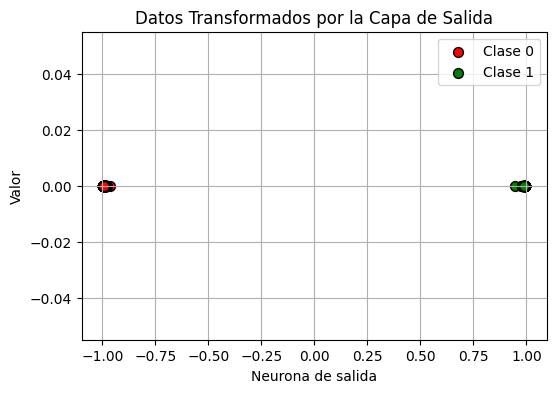

In [23]:
# Obtener los pesos y sesgos de la capa de salida
weights_hidden_3 = P_multi_2capas.coefs_[2]
bias_hidden_3 = P_multi_2capas.intercepts_[2]

# Añadir una columna de unos a las salidas de la segunda capa oculta para el bias
a_h_2_bias = np.hstack([np.ones((a_h_2.shape[0], 1)), a_h_2])

# Calcular la combinación lineal de las salidas de la segunda capa oculta y los pesos de la capa de salida
z_h_3 = np.dot(a_h_2_bias, np.vstack([bias_hidden_3, weights_hidden_3]))

# Aplicar la función de activación ReLU
a_h_3 = np.tanh(z_h_3)

# Graficar los datos transformados por la capa de salida
plt.figure(figsize=(6, 4))

for clase, color in zip(clases, colores):
    indices = Etiquetas_train == clase
    plt.scatter(a_h_3[indices, 0], np.zeros_like(a_h_3[indices, 0]), 
                color=color, label=etiquetas_clases.get(clase, f'Clase {clase}'), edgecolor='k', s=50)

plt.xlabel('Neurona de salida')
plt.ylabel('Valor')
plt.title('Datos Transformados por la Capa de Salida')
plt.legend()
plt.grid(True)
plt.show()

### **RESOLUCION DEL PROBLEMA CON ACTIVANCION TANH**

88
Precisión del modelo en el conjunto de prueba: 1.0


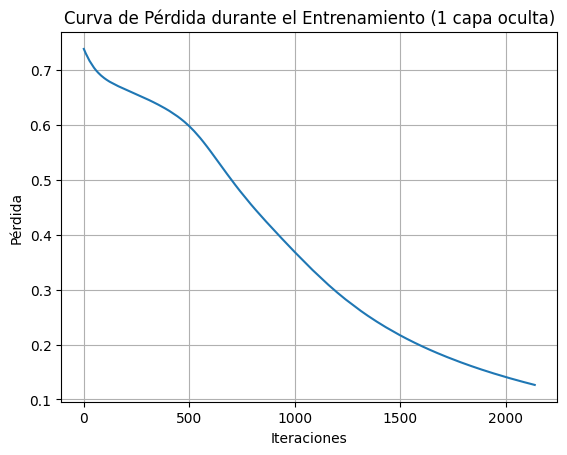

In [24]:
n = np.random.randint(100)
print(n)
90
# Definir el modelo con una capa oculta de 3 neuronas
P_mono_1capa = MLPClassifier(random_state=90, hidden_layer_sizes=(3), activation='tanh', solver='adam', max_iter=10000)

# Entrenar el modelo
P_mono_1capa.fit(Predictoras_train, Etiquetas_train)

# Evaluar el modelo
score = P_mono_1capa.score(Predictoras_test, Etiquetas_test)
print(f"Precisión del modelo en el conjunto de prueba: {score}")

# Graficar la curva de pérdida
plt.plot(P_mono_1capa.loss_curve_)
plt.title('Curva de Pérdida durante el Entrenamiento (1 capa oculta)')
plt.xlabel('Iteraciones')
plt.ylabel('Pérdida')
plt.grid(True)
plt.show()


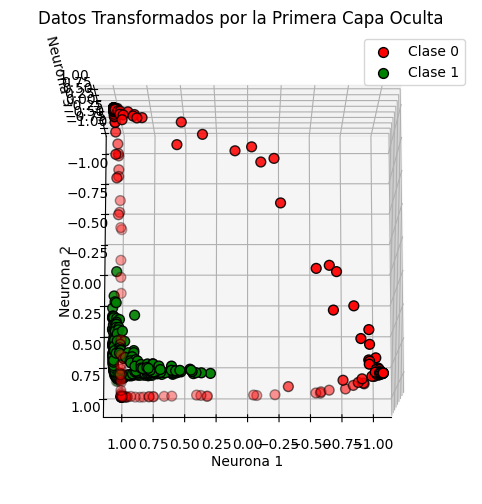

In [25]:
from mpl_toolkits.mplot3d import Axes3D

# Obtener los pesos y sesgos de la primera capa oculta
weights_hidden_1 = P_mono_1capa.coefs_[0]
bias_hidden_1 = P_mono_1capa.intercepts_[0]

# Añadir una columna de unos a las entradas para el bias
X_bias = np.hstack([np.ones((Predictoras_train.shape[0], 1)), Predictoras_train])

# Calcular la combinación lineal de las entradas y los pesos de la primera capa oculta
z_h_1 = np.dot(X_bias, np.vstack([bias_hidden_1, weights_hidden_1]))

# Aplicar la función de activación tanh
a_h_1 = np.tanh(z_h_1)

# Crear el gráfico en 3D
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Graficar los datos transformados por la primera capa oculta en 3D
for clase, color in zip(clases, colores):
    indices = Etiquetas_train == clase
    ax.scatter(a_h_1[indices, 0], a_h_1[indices, 1], a_h_1[indices, 2], 
               color=color, label=etiquetas_clases.get(clase, f'Clase {clase}'), edgecolor='k', s=50)

# Cambiar la perspectiva de la cámara
ax.view_init(elev=80, azim=90)  # Cambia 'elev' y 'azim' para ajustar el ángulo de vista

ax.set_xlabel('Neurona 1')
ax.set_ylabel('Neurona 2')
ax.set_zlabel('Neurona 3')
ax.set_title('Datos Transformados por la Primera Capa Oculta')
ax.legend()
plt.grid(True)
plt.show()

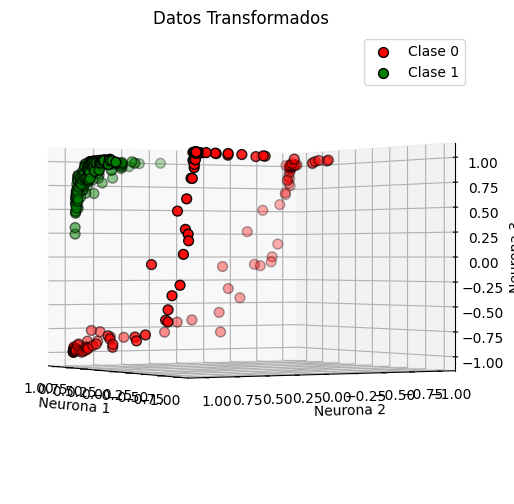

In [26]:

# Graficamos en 3D (o en 2D si se seleccionó n_components=2)
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

for clase, color in zip(clases, colores):
    indices = Etiquetas_train == clase
    ax.scatter(a_h_1[indices, 0], a_h_1[indices, 1], a_h_1[indices, 2], 
               color=color, label=etiquetas_clases.get(clase, f'Clase {clase}'), edgecolor='k', s=50)

ax.view_init(elev=0, azim=150)  # Cambia 'elev' y 'azim' para ajustar el ángulo de vista

ax.set_xlabel('Neurona 1')
ax.set_ylabel('Neurona 2')
ax.set_zlabel('Neurona 3')
ax.set_title('Datos Transformados')
plt.legend()
plt.show()


### **RESOLUCION CON LA FUNCION DE ACTIVACION LOGISTIC**

79
Precisión del modelo en el conjunto de prueba: 1.0


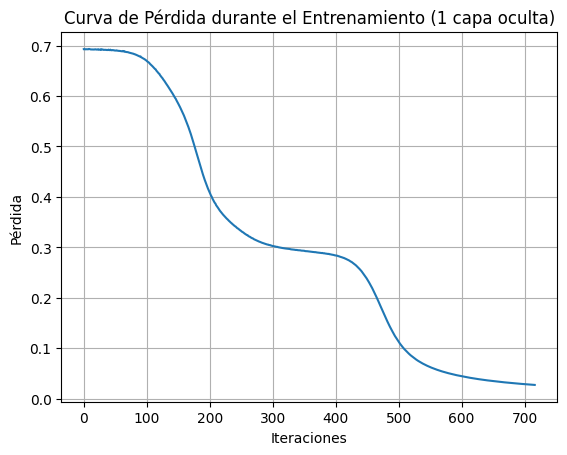

In [27]:
from sklearn.neural_network import MLPClassifier
n = np.random.randint(100)
print(n)
28
# Modelo con función de activación logística
P_multi_1capa = MLPClassifier(random_state=28, hidden_layer_sizes=(3), activation='logistic', solver='sgd', max_iter=10000, learning_rate='constant', learning_rate_init=0.15)

# Entrenar el modelo
P_multi_1capa.fit(Predictoras_train, Etiquetas_train)

# Evaluar el modelo
score = P_multi_1capa.score(Predictoras_test, Etiquetas_test)
print(f"Precisión del modelo en el conjunto de prueba: {score}")
# Graficar la curva de pérdida
plt.plot(P_multi_1capa.loss_curve_)
plt.title('Curva de Pérdida durante el Entrenamiento (1 capa oculta)')
plt.xlabel('Iteraciones')
plt.ylabel('Pérdida')
plt.grid(True)
plt.show()


[[ 4.33049502 -3.81495348 -9.32900426]
 [-6.2326357  -7.40976339 -1.39846259]]


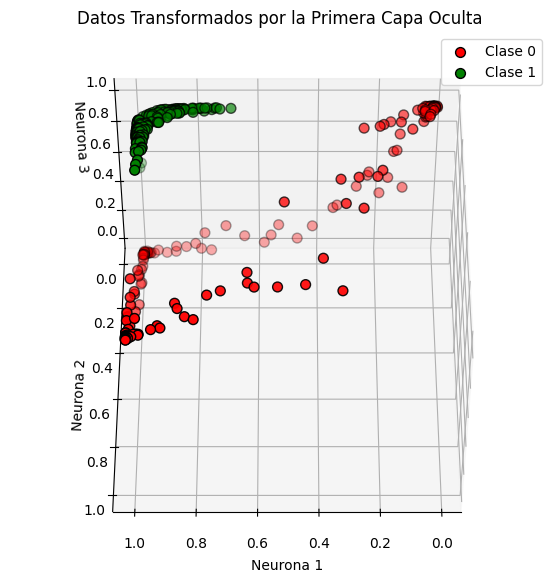

In [28]:
from mpl_toolkits.mplot3d import Axes3D

# Obtener los pesos y sesgos de la primera capa oculta
weights_hidden_4 = P_multi_1capa.coefs_[0]
bias_hidden_4 = P_multi_1capa.intercepts_[0]
print(weights_hidden_4)
# Añadir una columna de unos a las entradas para el bias
X_bias = np.hstack([np.ones((Predictoras_train.shape[0], 1)), Predictoras_train])

# Calcular la combinación lineal de las entradas y los pesos de la primera capa oculta
z_h_4 = np.dot(X_bias, np.vstack([bias_hidden_4, weights_hidden_4]))

# Aplicar la función de activación tanh
a_h_4 = logistic(z_h_4)

# Crear el gráfico en 3D
fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(111, projection='3d')

# Graficar los datos transformados por la primera capa oculta en 3D
for clase, color in zip(clases, colores):
    indices = Etiquetas_train == clase
    ax.scatter(a_h_4[indices, 0], a_h_4[indices, 1], a_h_4[indices, 2], 
               color=color, label=etiquetas_clases.get(clase, f'Clase {clase}'), edgecolor='k', s=50)

# Cambiar la perspectiva de la cámara
ax.view_init(elev=50, azim=90)  # Cambia 'elev' y 'azim' para ajustar el ángulo de vista

ax.set_xlabel('Neurona 1')
ax.set_ylabel('Neurona 2')
ax.set_zlabel('Neurona 3')
ax.set_title('Datos Transformados por la Primera Capa Oculta')
ax.legend()
plt.grid(True)
plt.show()